PACKAGES AND DEPENDENCIES

In [2]:
!pip install tensorflow opencv-python matplotlib

  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached matplotlib-3.9.1-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.2.1-cp312-cp312-win_amd64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.53.1-cp312-cp312-win_amd64.whl.metadata (165 kB)
  Using cached kiwisolver-1.4.5-cp312-cp312-win_amd64.whl.metadata (6.5 kB)
  Using cached pillow-10.4.0-cp312-cp312-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)
Using cached matplotlib-3.9.1-cp312-cp312-win_amd64.whl (8.0 MB)
Using cached contourpy-1.2.1-cp312-cp312-win_amd64.whl (189 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.53.1-cp312-cp312-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.5-cp312-cp312-win_amd64.whl (56 kB)
Using cached pillow-10.4.0-cp312-

In [5]:
import os
import tensorflow as tf

In [6]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# Configure GPU to run without using full VRAM

In [7]:
import cv2
import imghdr
from matplotlib import pyplot as plt

# Import OpenCV and IMGHDR, which checks image type of input

C:\Users\Raj\AppData\Local\Temp\ipykernel_6324\2603824197.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr



Data Loading


In [8]:
data_dir = 'data'

In [9]:
os.listdir(os.path.join(data_dir, 'button_shirt'))

['0x0.jpg',
 '10795212-276-157_4bfeeb84-6092-40d6-a194-024e52f30ec0-checkpoint.jpg',
 '10795212-I15-147_e5d53393-d893-4cbf-af6c-4dbdc485149f.jpg',
 '1125063_10.png',
 '1659708790-ArtistShirt3_1200x1800.jpg',
 '230316-button-down-bd-2x1.jpg',
 '32783.jpg',
 '451926.jpg',
 '619GawDMS-L._AC_UY1000_.jpg',
 '61jG25RnHrL._AC_UY1000_.jpg',
 '67038657_05_D1.jpg',
 '717Pk6V7asL._AC_UY1000_.jpg',
 '71TftlPLJ2L._AC_UY1000_.jpg',
 '7795190b-566d-4cbf-b280-9ade882c6b40.284b8a5191759ee09e83bc1c2e6b553f.jpeg',
 '81ZHZrIhLWL._AC_UY1000_.jpg',
 'ack_20c1987b-1ce4-4f07-b628-5d18f56fa6c8_1.6a2b0001d3a45a43b92c87343ee15c10.jpeg',
 'adaptive-everyday-magnetic-button-down-for-men-s-navy-check-joe-bella-38800526246125.jpg',
 'Alex_merino_shirt_grey_navy_03_500x_crop_center.jpg',
 'AW23MEN_SECOM-4115.jpg',
 'Bellabliss64e3c06b0b37a764e3c06b0b627.7458928264e3c06b0b627.jpg',
 'BG_OF_05286_Slate_SS24_0886.jpg',
 'BJ542121_FA22_011.jpg',
 'black-color-formal-shirt-with-button-down-collar-isolated-on-white.jpg',
 

In [10]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [ ]:
# img = cv2.imread(os.path.join(data_dir, 't_shirt', '76020_EBR.jpg'))
# img.shape

# Reads in image to numpy array
# Prints out the dimensions of the image

# plt.imshow(img)
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# plt.show()

# Plots the image
# Plots the image after converting from OpenCV BGR scheme to RGB scheme

In [38]:
for img_class in os.listdir(data_dir):
    # button_shirt, t-shirt, pants, etc
    for img in os.listdir(os.path.join(data_dir, img_class)):
        # Every image in class directories
        img_path = os.path.join(data_dir, img_class, img)
        # Individual image path
        
        try:
            img = cv2.imread(img_path)
            # Open up an image
            tip = imghdr.what(img_path)
            # Image extension
            if tip not in image_exts:
                print("Image not in the extension list {}".format(img_path))
                os.remove(img_path)

                # If image format doesn't exist in the extension list, 
                # remove the image and it's path
        
        except Exception as e:
            print('Issue with image {}'.format(img_path))
            # os.remove(img_path)

In [40]:
import numpy as np

In [13]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [161]:
data = tf.keras.utils.image_dataset_from_directory('data', batch_size = 32)

# Load images onto data

Found 1854 files belonging to 13 classes.


In [162]:
data_iterator = data.as_numpy_iterator()

# Instantiates numpy iterator that will sequentially batch data

In [118]:
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x00000262A0A73380>)

In [163]:
batch = data_iterator.next()

    # Get batch from iterator

In [143]:
len(batch)

# Shows the length of the batch generated

2

In [144]:
batch[0].shape

# Images represented as numpy arrays

(32, 256, 256, 3)

In [146]:
batch[1]

# Prints each image batch represented as [0,14] to correspond to the correct class

array([11,  5,  1,  2,  5,  5,  4,  6, 11,  4,  6,  8,  8,  2,  1,  7,  2,
        6,  6,  3,  2,  6,  9,  7,  3,  8,  1,  0, 11,  5,  0,  9])

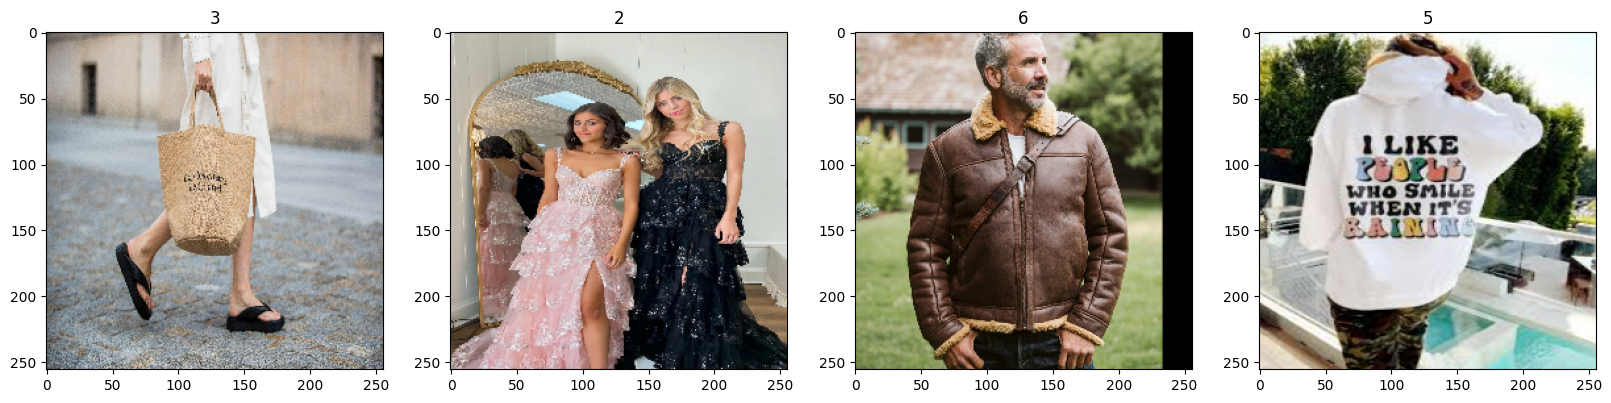

In [164]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


# Print four images from the batch

In [148]:
data = data.map(lambda x,y: (x/255, y))

# .map applies formatting to all images in pipeline, performs transformation on x variable (division)
# x represents images
# y represents target variables (classes)

In [126]:
data.as_numpy_iterator().next()[0]

# IF values look off (i.e not in range [0,1]), you probably ran the division function twice
# Reload the data, grab another batch, plot, normalize, then run this code again

array([[[[0.3764706 , 0.39215687, 0.09411765],
         [0.39956343, 0.4152497 , 0.11721048],
         [0.47824755, 0.49227175, 0.20254289],
         ...,
         [0.5070006 , 0.47954965, 0.20503983],
         [0.5582184 , 0.53076744, 0.25896907],
         [0.56078434, 0.53333336, 0.26666668]],

        [[0.35686275, 0.37254903, 0.07058824],
         [0.4979856 , 0.5136719 , 0.21427695],
         [0.6606388 , 0.6763251 , 0.38160998],
         ...,
         [0.60345435, 0.5760034 , 0.30149356],
         [0.6212546 , 0.59380364, 0.3220052 ],
         [0.6392157 , 0.6117647 , 0.34509805]],

        [[0.44705883, 0.46666667, 0.15294118],
         [0.61640626, 0.6360141 , 0.3222886 ],
         [0.78732383, 0.8052696 , 0.49653032],
         ...,
         [0.52224267, 0.5065564 , 0.228125  ],
         [0.49455422, 0.47751224, 0.20314798],
         [0.5176471 , 0.49803922, 0.23137255]],

        ...,

        [[0.2       , 0.22352941, 0.08235294],
         [0.23848805, 0.26201746, 0.12084099]

In [149]:
print(len(data))

58


In [150]:
train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.2) + 1
test_size = int(len(data) * 0.1)

In [151]:
train_size + val_size + test_size

# train = 52 batches * 32 images / batch = 1664 images
# val = 16 batches * 32 images / batch = 512 images
# test = 7 batches * 32 images / batch = 224 images

57

In [152]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

# .take allocates the batch size into respective set
# .take skips the previous and takes the remaining batches of the partition

TRAINING

In [153]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

In [154]:
model = Sequential()

model.add(Conv2D(32, (3,3), 1, activation = 'relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

# 1 denotes stride size for Convolution
# Default maxpooling is a (2,2) grid size

model.add(Conv2D(64, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Dropout(0.5))
model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(13, activation = 'softmax'))

In [155]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 13)                  │           3,341 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,666,957 (25.43 MB)

 Trainable params: 6,666,957 (25.43 MB)

 Non-trainable params: 0 (0.00 B)

In [156]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ['accuracy'])

In [157]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 13)                  │           3,341 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,666,957 (25.43 MB)

 Trainable params: 6,666,957 (25.43 MB)

 Non-trainable params: 0 (0.00 B)

In [158]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

# Creates space to place log model training for future performance

In [159]:
history = model.fit(train, epochs = 10, validation_data = val, callbacks = [tensorboard_callback])

# Add steps_per_epoch and val_steps for fitting (i.e. how many iterations are needed for one epoch to be completed)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 37s 813ms/step - accuracy: 0.0877 - loss: 2.6488 - val_accuracy: 0.1979 - val_loss: 2.4339
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 32s 786ms/step - accuracy: 0.2002 - loss: 2.4224 - val_accuracy: 0.2734 - val_loss: 2.2072
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.3007 - loss: 2.0933 - val_accuracy: 0.3646 - val_loss: 1.9752
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.4447 - loss: 1.7317 - val_accuracy: 0.4505 - val_loss: 1.7957
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.5681 - loss: 1.3605 - val_accuracy: 0.5026 - val_loss: 1.6559
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.6777 - loss: 0.9734 - val_accuracy: 0.5521 - val_loss: 1.7053
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.7998 - loss: 0.6223 - val_accuracy: 0.5547 - val_loss: 1.8183
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.8486 - loss: 0.4843 - val_accuracy: 0.5885 - val

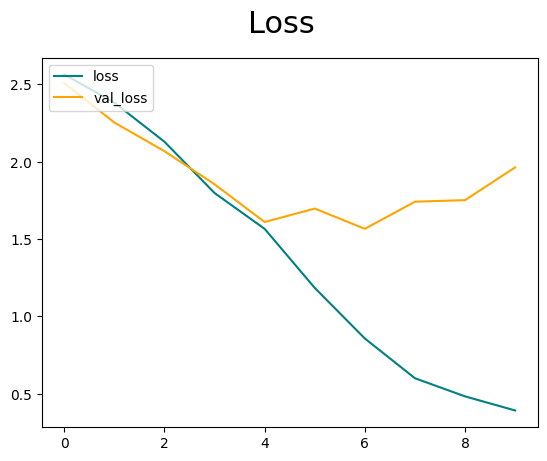

In [138]:
fig = plt.figure()
plt.plot(history.history['loss'], color = 'teal', label = 'loss')
plt.plot(history.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize = 22)
plt.legend(loc = 'upper left')
plt.show()

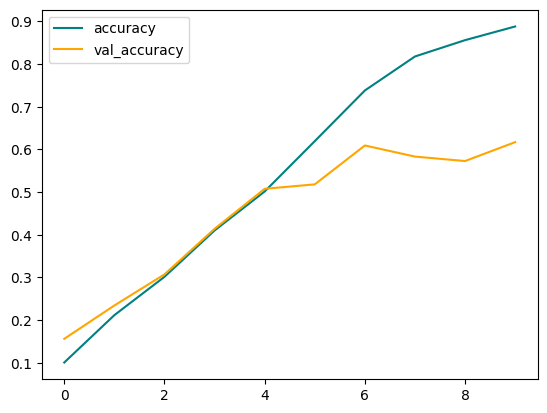

In [139]:
##### fig = plt.figure()
plt.plot(history.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(history.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize = 22)
plt.legend(loc = 'upper left')
plt.show()